In [61]:
import pandas as pd
import sklearn as sk
import numpy
import matplotlib
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [14]:
data_set_wine = datasets.load_wine()

#Análise exploratória

print(data_set_wine.target.shape)
print(data_set_wine.data.shape)
print(data_set_wine.feature_names)
print(data_set_wine.target_names)

(178,)
(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [16]:

dataframe = pd.DataFrame(data_set_wine.data, columns=data_set_wine.feature_names)

print("Número de valores nulos por coluna:")
print(dataframe.isnull().sum())

dataframe.head()

Número de valores nulos por coluna:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


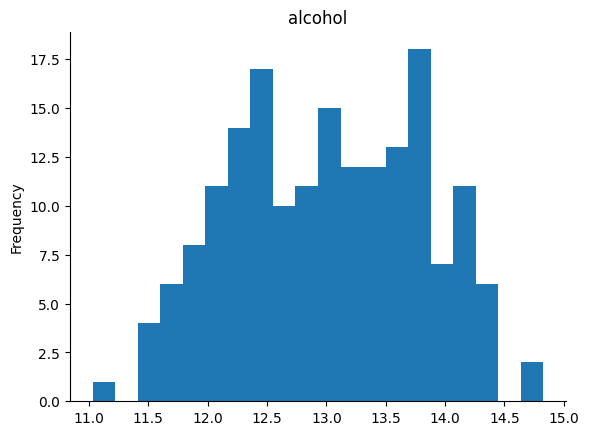

In [19]:
svc = SVC()

In [29]:

index_x_train, index_x_test, index_y_train, index_y_test = train_test_split(
    data_set_wine.data, data_set_wine.target, test_size=0.30, random_state=42
)

svc.fit(index_x_train, index_y_train)


SVC()

In [33]:

y_predict = svc.predict(index_x_test)
print('Previsto:', y_predict)

Previsto: [0 0 1 0 1 0 1 2 1 2 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 2 0 0 0 1
 1 1 1 0 1 1 2 1 0 2 1 1 0 1 0 0 1]


In [38]:
#acurácia
acuracia = accuracy_score(index_y_test, y_predict)
print(f"Acurácia: {acuracia:.4f}\n")

# Relatório de Classificação (inclui Precisão, Recall e F1-score para cada classe)
print("Relatório de Classificação:\n", classification_report(index_y_test, y_predict))


Acurácia: 0.7593

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.63      0.90      0.75        21
           2       0.60      0.21      0.32        14

    accuracy                           0.76        54
   macro avg       0.74      0.71      0.69        54
weighted avg       0.75      0.76      0.72        54



In [41]:
# Aplicação da regressão logistica
scaler = StandardScaler()


x_train_scaled = scaler.fit_transform(index_x_train)
x_test_scaled = scaler.transform(index_x_test)

print(f"\nDados de treino: {x_train_scaled.shape}")
print(f"Dados de teste: {x_test_scaled.shape}")


Dados de treino: (124, 13)
Dados de teste: (54, 13)


In [47]:
logisticRegressionObject = LogisticRegression(random_state=42, max_iter=1000)
logisticRegressionObject.fit(x_train_scaled, index_y_train)


data_predicted = logisticRegressionObject.predict(x_test_scaled)


In [58]:
acuracia_logistic_regression = accuracy_score(index_y_test, data_predicted)
print(f"Acurácia: {acuracia_logistic_regression:.4f}\n")

# Relatório de Classificação (inclui Precisão, Recall e F1-score para cada classe)
print("Relatório de Classificação:\n", classification_report(index_y_test, data_predicted))

Acurácia: 0.9815

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



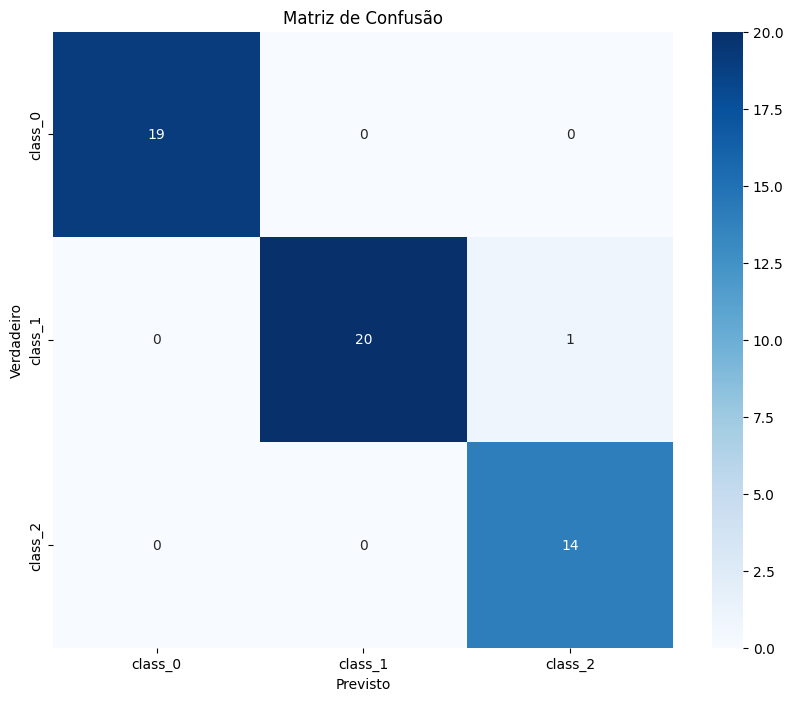

In [62]:
matriz_confusao_logistic_regression = confusion_matrix(index_y_test, data_predicted)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusao_logistic_regression, annot=True, fmt='d', cmap='Blues',
            xticklabels=data_set_wine.target_names,
            yticklabels=data_set_wine.target_names)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
gnb = GaussianNB()

gnb.fit(index_x_train, index_y_train)

y_pred_gnb = gnb.predict(index_x_test)

In [56]:
acuracia_gaussiannb = accuracy_score(index_y_test, y_pred_gnb)
print(f"Acurácia: {acuracia_gaussiannb:.4f}\n")
print("Relatório de Classificação:\n", classification_report(index_y_test, y_pred_gnb))

Acurácia: 1.0000

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

